# EDA - Credit Risk Analysis

## PAKDD2010 Dataset

This notebook contains the exploratory data analysis for the credit risk dataset.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


In [10]:
# Define data path
data_path = Path("../../data/raw/PAKDD2010_Modeling_Data.txt")

# Load the data (tab-separated, using latin-1 encoding)
df = pd.read_csv(data_path, sep='\t', low_memory=False, encoding='latin-1')

print(f"Data loaded successfully!")
print(f"Dataset shape: {df.shape}")


Data loaded successfully!
Dataset shape: (49999, 54)


In [11]:
# Display first few rows
df.head()


,1,C,5,Web,0,1.1,F,6,1.2,0.1,RN,Assu,1.3,RN.1,Santana do Matos,Centro,Y,105,1.4,15,N,1.5,900,0.2,1.6,1.7,0.3,0.4,0.5,0.6,0.7,0.8,0.9,N.1,,NULL,NULL.1,N.2,.1,0.10,9,4,NULL.2,NULL.3,0.11,0.12,0.13,0.14,1.8,N.3,32,595,595.1,1.9
0,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
1,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
2,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
3,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1
4,6,C,10,0,0,1,M,2,0,0,MG,CARMO DO RIO CLARO,1,MG,ALFENAS,Campos Eliseos,Y,33,1.0,4.0,N,1,500.0,0.0,0,0,0,0,0,1,1,0.0,1,Y,MG,ALFENAS,JARDIM SAO CARLOS,N,,0,9.0,2.0,0.0,0.0,0,0,0,0,2,N,40,371,371,1


In [12]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   1                 49999 non-null  int64  
 1   C                 49999 non-null  object 
 2   5                 49999 non-null  int64  
 3   Web               49999 non-null  object 
 4   0                 49999 non-null  int64  
 5   1.1               49999 non-null  int64  
 6   F                 49999 non-null  object 
 7   6                 49999 non-null  int64  
 8   1.2               49999 non-null  int64  
 9   0.1               49999 non-null  int64  
 10  RN                49999 non-null  object 
 11  Assu              49999 non-null  object 
 12  1.3               49999 non-null  int64  
 13  RN.1              49999 non-null  object 
 14  Santana do Matos  49999 non-null  object 
 15  Centro            49999 non-null  object 
 16  Y                 49999 non-null  object

In [13]:
# Display column names
print(f"Total number of columns: {len(df.columns)}")
print("\nColumn names:")
print(df.columns.tolist())


Total number of columns: 54

Column names:
['1', 'C', '5', 'Web', '0', '1.1', 'F', '6', '1.2', '0.1', 'RN', 'Assu', '1.3', 'RN.1', 'Santana do Matos', 'Centro', 'Y', '105', '1.4', '15', 'N', '1.5', '900', '0.2', '1.6', '1.7', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', 'N.1', ' ', 'NULL', 'NULL.1', 'N.2', ' .1', '0.10', '9', '4', 'NULL.2', 'NULL.3', '0.11', '0.12', '0.13', '0.14', '1.8', 'N.3', '32', '595', '595.1', '1.9']


In [14]:
# Basic statistics for numerical columns
df.describe()


,1,5,0,1.1,6,1.2,0.1,1.3,1.4,15,1.5,900,0.2,1.6,1.7,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,9,4,NULL.2,NULL.3,0.11,0.12,0.13,0.14,1.8,32,1.9
count,49999.000000,49999.000000,49999.0,49999.000000,49999.000000,49999.000000,49999.0,49999.000000,48650.000000,46222.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,4.999900e+04,49999.000000,49999.000000,42243.000000,42686.000000,21116.000000,17662.000000,49999.0,49999.0,49999.0,49999.0,49999.000000,49999.000000,49999.000000
mean,25001.000000,12.870077,0.0,1.006540,2.148323,0.650513,0.0,0.961599,1.252230,9.727035,0.802276,886.678170,35.435469,0.111422,0.097442,0.001320,0.001740,0.002040,0.357847,0.357847,2.322419e+03,0.336147,0.009320,8.061762,2.484281,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275706,43.248745,0.260805
std,14433.612391,6.608357,0.0,0.080607,1.322751,1.193666,0.0,0.202107,0.867841,10.668928,0.398287,7847.037799,891.524044,0.314657,0.296562,0.036309,0.041678,0.045121,0.479955,0.479955,4.235841e+04,0.472395,0.383457,3.220139,1.532262,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988295,14.989115,0.439078
min,2.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.000000,0.000000
25%,12501.500000,10.000000,0.0,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.000000,0.000000
50%,25001.000000,10.000000,0.0,1.000000,2.000000,0.000000,0.0,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.000000,0.000000
75%,37500.500000,15.000000,0.0,1.000000,2.000000,1.000000,0.0,1.000000,1.000000,15.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,9.000000,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.000000,1.000000
max,50000.000000,25.000000,0.0,2.000000,7.000000,53.000000,0.0,2.000000,5.000000,228.000000,1.000000,959000.000000,194344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000e+06,1.000000,35.000000,18.000000,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.000000,1.000000


In [15]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

# Filter to show only columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print(f"Total columns with missing values: {len(missing_df)}")
print(f"\nColumns with missing values:")
missing_df


Total columns with missing values: 8

Columns with missing values:


,Column,Missing Count,Missing Percentage
35,NULL,33782,67.565351
36,NULL.1,33782,67.565351
43,NULL.3,32337,64.675294
42,NULL.2,28883,57.767155
40,9,7756,15.512310
41,4,7313,14.626293
19,15,3777,7.554151
18,1.4,1349,2.698054


In [16]:
# Check data types
print("Data types summary:")
print(df.dtypes.value_counts())
print("\nDetailed data types:")
df.dtypes


Data types summary:
int64      25
object     20
float64     9
dtype: int64

Detailed data types:


1                     int64
C                    object
5                     int64
Web                  object
0                     int64
1.1                   int64
F                    object
6                     int64
1.2                   int64
0.1                   int64
RN                   object
Assu                 object
1.3                   int64
RN.1                 object
Santana do Matos     object
Centro               object
Y                    object
105                  object
1.4                 float64
15                  float64
N                    object
1.5                   int64
900                 float64
0.2                 float64
1.6                   int64
1.7                   int64
0.3                   int64
0.4                   int64
0.5                   int64
0.6                   int64
0.7                   int64
0.8                 float64
0.9                   int64
N.1                  object
                     object
NULL                

In [17]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
print(f"Percentage of duplicates: {(duplicate_count / len(df)) * 100:.2f}%")


Number of duplicate rows: 0
Percentage of duplicates: 0.00%


In [19]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")
print(f"\nNumerical columns: {numerical_cols}...")  
print(f"\nCategorical columns: {categorical_cols}...")  


Numerical columns: 34
Categorical columns: 20

Numerical columns: ['1', '5', '0', '1.1', '6', '1.2', '0.1', '1.3', '1.4', '15', '1.5', '900', '0.2', '1.6', '1.7', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '9', '4', 'NULL.2', 'NULL.3', '0.11', '0.12', '0.13', '0.14', '1.8', '32', '1.9']...

Categorical columns: ['C', 'Web', 'F', 'RN', 'Assu', 'RN.1', 'Santana do Matos', 'Centro', 'Y', '105', 'N', 'N.1', ' ', 'NULL', 'NULL.1', 'N.2', ' .1', 'N.3', '595', '595.1']...


In [ ]:
# Check for columns with constant values (no variance)
constant_cols = []
for col in df.columns:
    if df[col].nunique() <= 1:
        constant_cols.append(col)

print(f"Columns with constant values (no variance): {len(constant_cols)}")
if constant_cols:
    print(f"\nConstant columns: {constant_cols}")
else:
    print("\nNo constant columns found.")


Columns with constant values (no variance): 9

Constant columns: ['C', '0', '0.1', 'N', '0.11', '0.12', '0.13', '0.14', 'N.3']


In [25]:
# Check for columns with very high cardinality (potential identifiers)
high_cardinality = []
for col in df.columns:
    unique_ratio = df[col].nunique() / len(df)
    if unique_ratio > 0.5:  # More than 50% unique values
        high_cardinality.append((col, df[col].nunique(), unique_ratio))

if high_cardinality:
    print("Columns with high cardinality (potential IDs):")
    for col, n_unique, ratio in high_cardinality:
        print(f"  {col}: {n_unique} unique values ({ratio*100:.1f}%)")
else:
    print("No high cardinality columns found.")


Columns with high cardinality (potential IDs):
  1: 49999 unique values (100.0%)


In [26]:
# Display last few rows to check data consistency
df.tail()


,1,C,5,Web,0,1.1,F,6,1.2,0.1,RN,Assu,1.3,RN.1,Santana do Matos,Centro,Y,105,1.4,15,N,1.5,900,0.2,1.6,1.7,0.3,0.4,0.5,0.6,0.7,0.8,0.9,N.1,,NULL,NULL.1,N.2,.1,0.10,9,4,NULL.2,NULL.3,0.11,0.12,0.13,0.14,1.8,N.3,32,595,595.1,1.9
49994,49996,C,10,0,0,1,F,1,2,0,RN,NATAL,1,RN,NATAL,PAJUCARA,Y,105,1.0,14.0,N,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,1,N,,NaN,NaN,N,,0,9.0,4.0,0.0,0.0,0,0,0,0,1,N,36,591,591,1
49995,49997,C,25,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,Y,12,1.0,15.0,N,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,2,N,21,186,186,0
49996,49998,C,5,Web,0,1,M,2,3,0,PR,RIO BONITO,1,SP,GUARULHOS,jardim vida nova,Y,5,2.0,5.0,N,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,SP,GUARULHOS,ITAPEGICA,Y,5,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,41,715,715,0
49997,49999,C,1,Web,0,1,F,1,1,0,SP,SAO PAULO,1,MG,CONTAGEM,VILA BELEM,Y,29,1.0,NaN,N,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,0,Y,MG,BETIM,JARDIM ALTEROSA,Y,29,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,28,320,320,1
49998,50000,C,10,Web,0,1,F,2,2,0,SP,PINDABA,1,SP,Pindamonhangaba,Feital,N,,1.0,9.0,N,1,719.38,0.0,0,0,0,0,0,0,0,0.0,0,Y,SP,PINDABA,CIDADE NOVA,Y,9,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,27,124,124,0


In [27]:
# Check memory usage
memory_usage = df.memory_usage(deep=True)
print(f"Total memory usage: {memory_usage.sum() / 1024**2:.2f} MB")
print(f"\nTop 10 columns by memory usage:")
memory_usage.sort_values(ascending=False).head(10)


Total memory usage: 68.57 MB

Top 10 columns by memory usage:


Centro              3400659
Santana do Matos    3337202
Assu                3311019
595.1               2999944
595                 2999944
Web                 2965684
RN.1                2949941
105                 2948044
RN                  2947877
                    2915635
dtype: int64

## Initial Summary

Based on the initial exploration above, we can see:
- Dataset dimensions
- Column types and names
- Missing values distribution
- Basic statistics

Next steps: deeper analysis of distributions, correlations, and target variable (if identified).


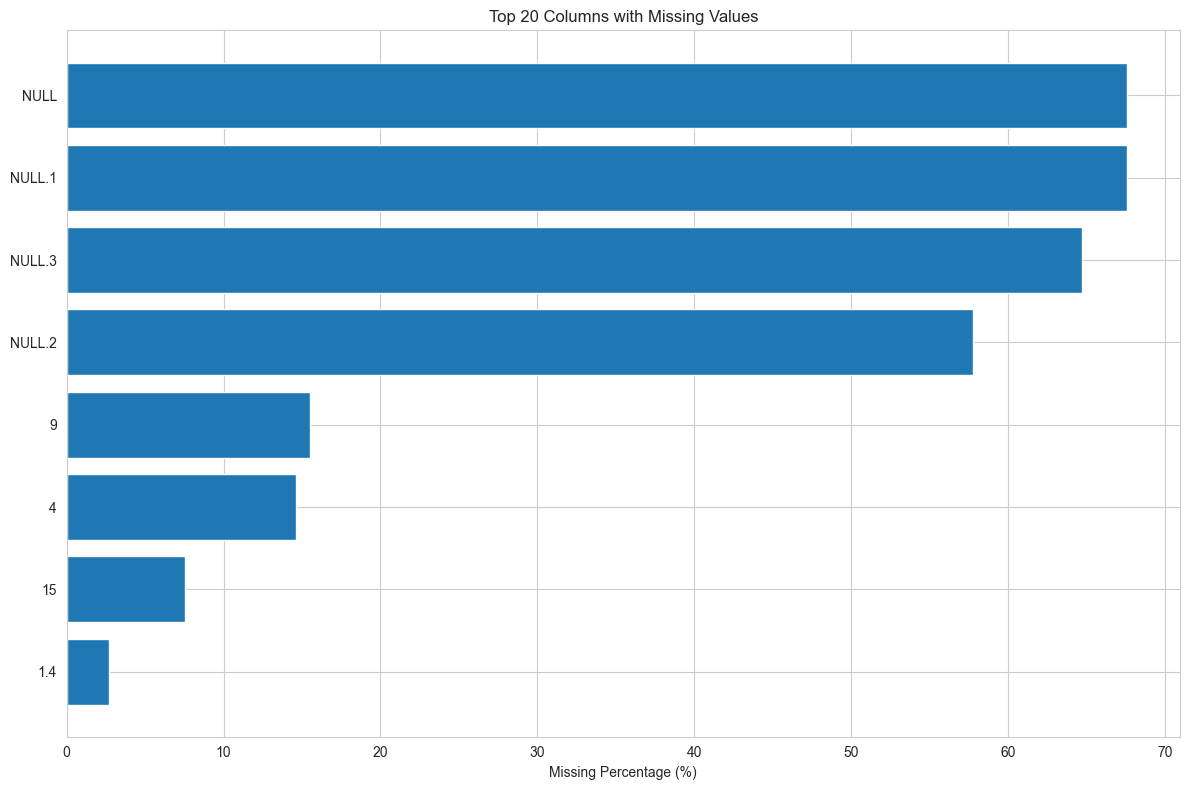

In [28]:
# Visualize missing values pattern
if len(missing_df) > 0:
    plt.figure(figsize=(12, 8))
    top_missing = missing_df.head(20)  # Top 20 columns with missing values
    plt.barh(range(len(top_missing)), top_missing['Missing Percentage'].values)
    plt.yticks(range(len(top_missing)), top_missing['Column'].values)
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 20 Columns with Missing Values')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("No missing values to visualize.")


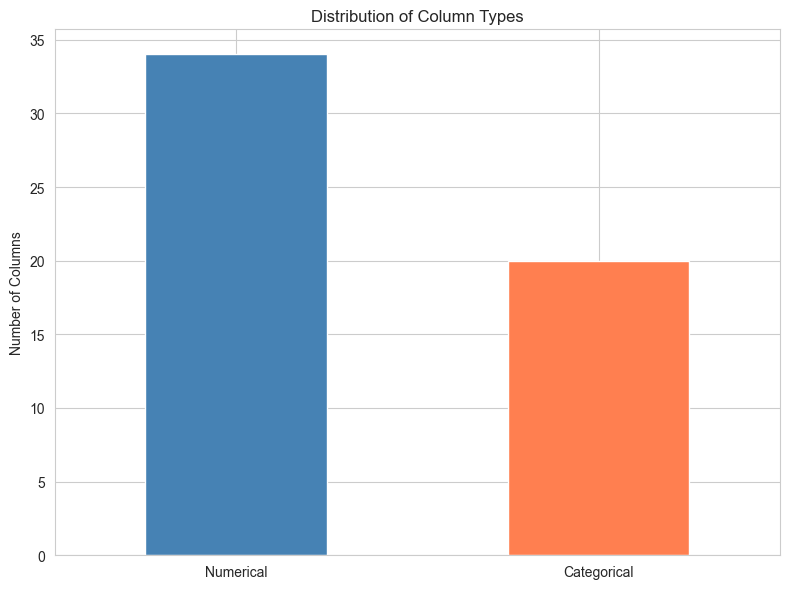

In [29]:
# Distribution of data types
if len(numerical_cols) > 0 or len(categorical_cols) > 0:
    type_counts = pd.Series({
        'Numerical': len(numerical_cols),
        'Categorical': len(categorical_cols)
    })
    
    plt.figure(figsize=(8, 6))
    type_counts.plot(kind='bar', color=['steelblue', 'coral'])
    plt.title('Distribution of Column Types')
    plt.ylabel('Number of Columns')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


## Deep Analysis: Target Variable, Outliers, and Feature Influence


Target variable: '1.9'

Target distribution:
0    36959
1    13040
Name: 1.9, dtype: int64

Target distribution (percentage):
0    73.919478
1    26.080522
Name: 1.9, dtype: float64

Target data type: int64
Unique values: [1 0]


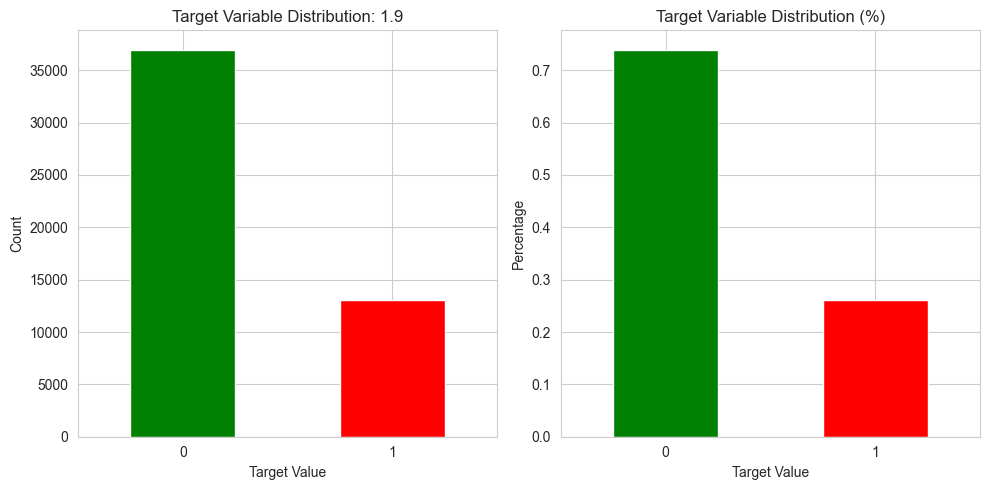


Number of features: 52


In [30]:
# Identify target variable (last column)
target_col = df.columns[-1]
print(f"Target variable: '{target_col}'")
print(f"\nTarget distribution:")
print(df[target_col].value_counts())
print(f"\nTarget distribution (percentage):")
print(df[target_col].value_counts(normalize=True) * 100)
print(f"\nTarget data type: {df[target_col].dtype}")
print(f"Unique values: {df[target_col].unique()}")

# Create target variable for analysis
target = df[target_col].copy()

# Visualize target distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
target.value_counts().plot(kind='bar', color=['green', 'red'])
plt.title(f'Target Variable Distribution: {target_col}')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
target.value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title(f'Target Variable Distribution (%)')
plt.xlabel('Target Value')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Separate features from target (exclude ID column '1' and constant columns if any)
features_df = df.drop(columns=[target_col, '1'])  # Remove target and ID column
print(f"\nNumber of features: {len(features_df.columns)}")


### Outlier Detection and Analysis


In [31]:
# Outlier Detection using IQR (Interquartile Range) method
def detect_outliers_iqr(data, col):
    """Detect outliers using IQR method"""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Outlier Detection using Z-score method
def detect_outliers_zscore(data, col, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
    outliers = data[z_scores > threshold]
    return outliers, z_scores

# Analyze outliers for all numerical columns
outlier_summary = []
numerical_features = features_df.select_dtypes(include=[np.number]).columns.tolist()

print("="*70)
print("OUTLIER ANALYSIS SUMMARY")
print("="*70)

for col in numerical_features:
    if features_df[col].isnull().all():
        continue
        
    # IQR method
    outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(features_df, col)
    n_outliers_iqr = len(outliers_iqr)
    pct_outliers_iqr = (n_outliers_iqr / len(features_df)) * 100
    
    # Z-score method
    outliers_zscore, z_scores = detect_outliers_zscore(features_df, col, threshold=3)
    n_outliers_zscore = len(outliers_zscore)
    pct_outliers_zscore = (n_outliers_zscore / len(features_df)) * 100
    
    outlier_summary.append({
        'Column': col,
        'Outliers (IQR)': n_outliers_iqr,
        'Outliers % (IQR)': round(pct_outliers_iqr, 2),
        'Outliers (Z-score)': n_outliers_zscore,
        'Outliers % (Z-score)': round(pct_outliers_zscore, 2),
        'Min': features_df[col].min(),
        'Q1': features_df[col].quantile(0.25),
        'Median': features_df[col].median(),
        'Q3': features_df[col].quantile(0.75),
        'Max': features_df[col].max()
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values('Outliers % (IQR)', ascending=False)

print(f"\nColumns with most outliers (IQR method):")
print(outlier_df.head(15).to_string(index=False))

# Save top columns with outliers for visualization
top_outlier_cols = outlier_df.head(6)['Column'].tolist()


OUTLIER ANALYSIS SUMMARY

Columns with most outliers (IQR method):
Column  Outliers (IQR)  Outliers % (IQR)  Outliers (Z-score)  Outliers % (Z-score)  Min    Q1  Median    Q3       Max
     9           12152             24.30                   1                  0.00  0.0   9.0     9.0   9.0      18.0
   1.5            9886             19.77                   0                  0.00  0.0   1.0     1.0   1.0       1.0
     5            8787             17.57                   0                  0.00  1.0  10.0    10.0  15.0      25.0
     6            7912             15.82                 534                  1.07  0.0   1.0     2.0   2.0       7.0
   1.8            7310             14.62                1295                  2.59  1.0   1.0     1.0   1.0       7.0
   1.4            7079             14.16                2294                  4.59  0.0   1.0     1.0   1.0       5.0
   1.6            5571             11.14                   0                  0.00  0.0   0.0     0.0   0.0

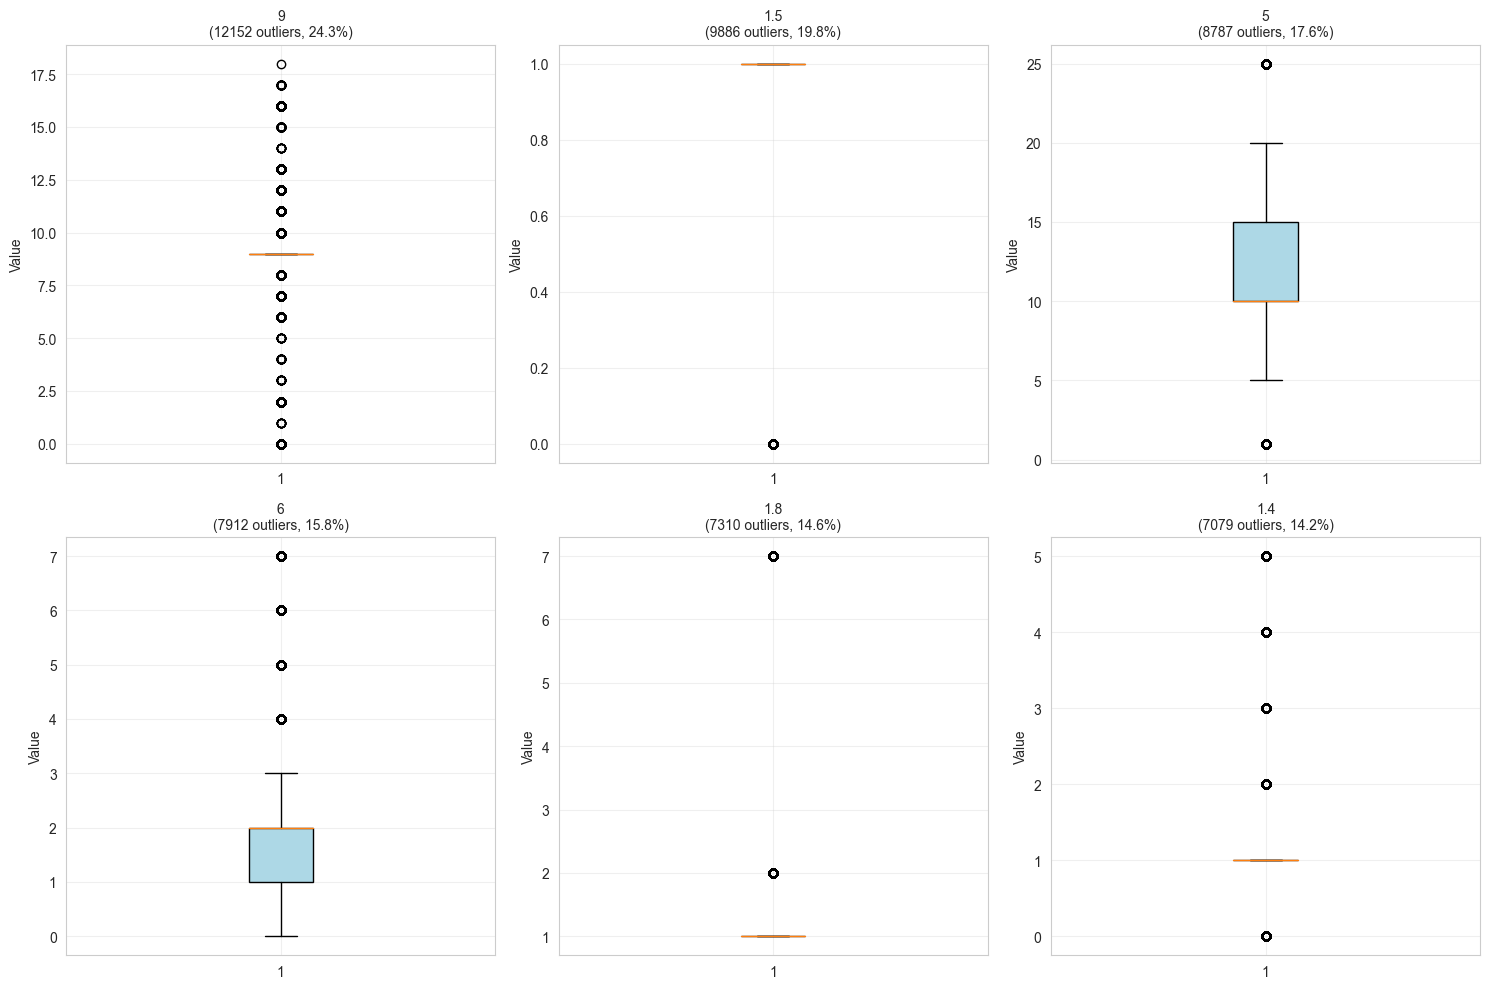

In [32]:
# Visualize outliers for top columns
if len(top_outlier_cols) > 0:
    n_cols = min(3, len(top_outlier_cols))
    n_rows = (len(top_outlier_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(top_outlier_cols[:n_rows*n_cols]):
        ax = axes[idx]
        
        # Box plot to visualize outliers
        box_data = features_df[col].dropna()
        bp = ax.boxplot(box_data, vert=True, patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')
        
        # Add outliers count
        outliers_iqr, _, _ = detect_outliers_iqr(features_df, col)
        n_outliers = len(outliers_iqr)
        
        ax.set_title(f'{col}\n({n_outliers} outliers, {n_outliers/len(features_df)*100:.1f}%)', fontsize=10)
        ax.set_ylabel('Value')
        ax.grid(True, alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(top_outlier_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


### Feature Influence on Target Variable


NUMERICAL FEATURES INFLUENCE ON TARGET


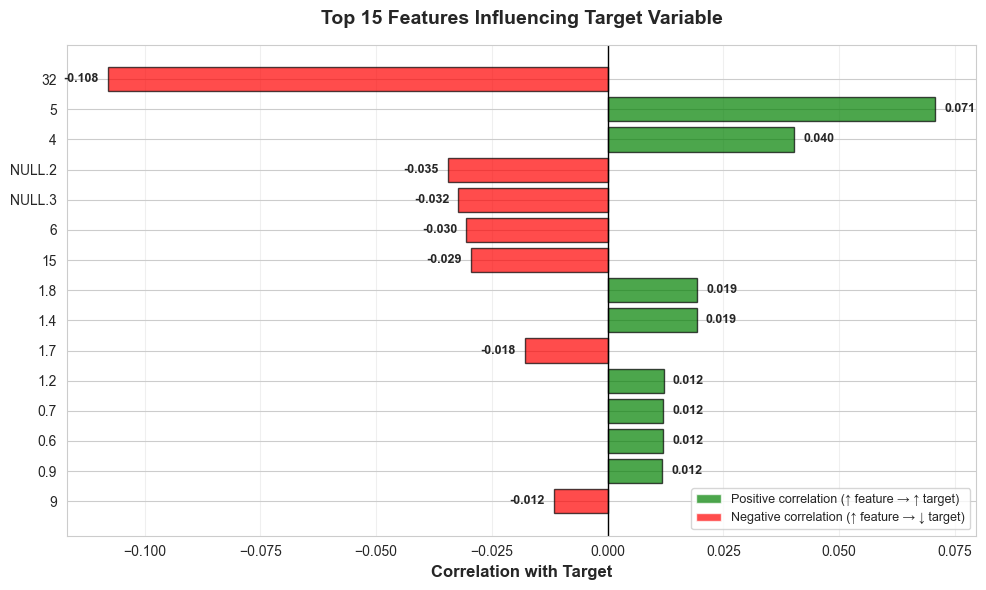


Top 15 features influencing target:
Feature  Correlation
     32      -0.1079
      5       0.0707
      4       0.0402
 NULL.2      -0.0345
 NULL.3      -0.0322
      6      -0.0305
     15      -0.0294
    1.8       0.0193
    1.4       0.0192
    1.7      -0.0178
    1.2       0.0121
    0.6       0.0120
    0.7       0.0120
    0.9       0.0117
      9      -0.0116


In [ ]:
# Analyze numerical features' influence on target
print("="*70)
print("NUMERICAL FEATURES INFLUENCE ON TARGET")
print("="*70)

# Calculate correlation with target for all numerical features
feature_influence = []

for col in numerical_features:
    if features_df[col].isnull().all():
        continue
    
    # Calculate correlation with target
    correlation = df[col].corr(df[target_col])
    
    # Calculate mean difference between target classes
    target_values = sorted(df[target_col].unique())
    if len(target_values) == 2:
        mean_class0 = df[df[target_col] == target_values[0]][col].mean()
        mean_class1 = df[df[target_col] == target_values[1]][col].mean()
        mean_diff = abs(mean_class1 - mean_class0)
        
        feature_influence.append({
            'Feature': col,
            'Correlation': round(correlation, 4),
            'Abs Correlation': abs(correlation)
        })

influence_df = pd.DataFrame(feature_influence)
influence_df = influence_df.sort_values('Abs Correlation', ascending=False)

# Select top 15 features
top_n = min(15, len(influence_df))
top_features = influence_df.head(top_n).copy()

# Create horizontal bar chart (much clearer than heatmap)
fig, ax = plt.subplots(figsize=(10, max(6, top_n * 0.4)))

# Sort by absolute correlation for better visualization
top_features_sorted = top_features.sort_values('Abs Correlation', ascending=True)

# Create colors: green for positive, red for negative
colors = ['green' if x > 0 else 'red' for x in top_features_sorted['Correlation']]

# Create horizontal bar chart
bars = ax.barh(range(len(top_features_sorted)), 
               top_features_sorted['Correlation'].values,
               color=colors, 
               alpha=0.7,
               edgecolor='black',
               linewidth=1)

# Add value labels on bars
for i, (idx, row) in enumerate(top_features_sorted.iterrows()):
    value = row['Correlation']
    x_pos = value + 0.002 if value > 0 else value - 0.002
    ax.text(x_pos, i, f'{value:.3f}', 
            va='center', ha='left' if value > 0 else 'right',
            fontsize=9, fontweight='bold')

# Customize chart
ax.set_yticks(range(len(top_features_sorted)))
ax.set_yticklabels(top_features_sorted['Feature'].values, fontsize=10)
ax.set_xlabel('Correlation with Target', fontsize=12, fontweight='bold')
ax.set_title(f'Top {top_n} Features Influencing Target Variable', 
             fontsize=14, fontweight='bold', pad=15)
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax.grid(True, alpha=0.3, axis='x')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', alpha=0.7, label='Positive correlation (↑ feature → ↑ target)'),
    Patch(facecolor='red', alpha=0.7, label='Negative correlation (↑ feature → ↓ target)')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=9)

plt.tight_layout()
plt.show()

# Display summary
print(f"\nTop {top_n} features influencing target:")
print(top_features[['Feature', 'Correlation']].to_string(index=False))


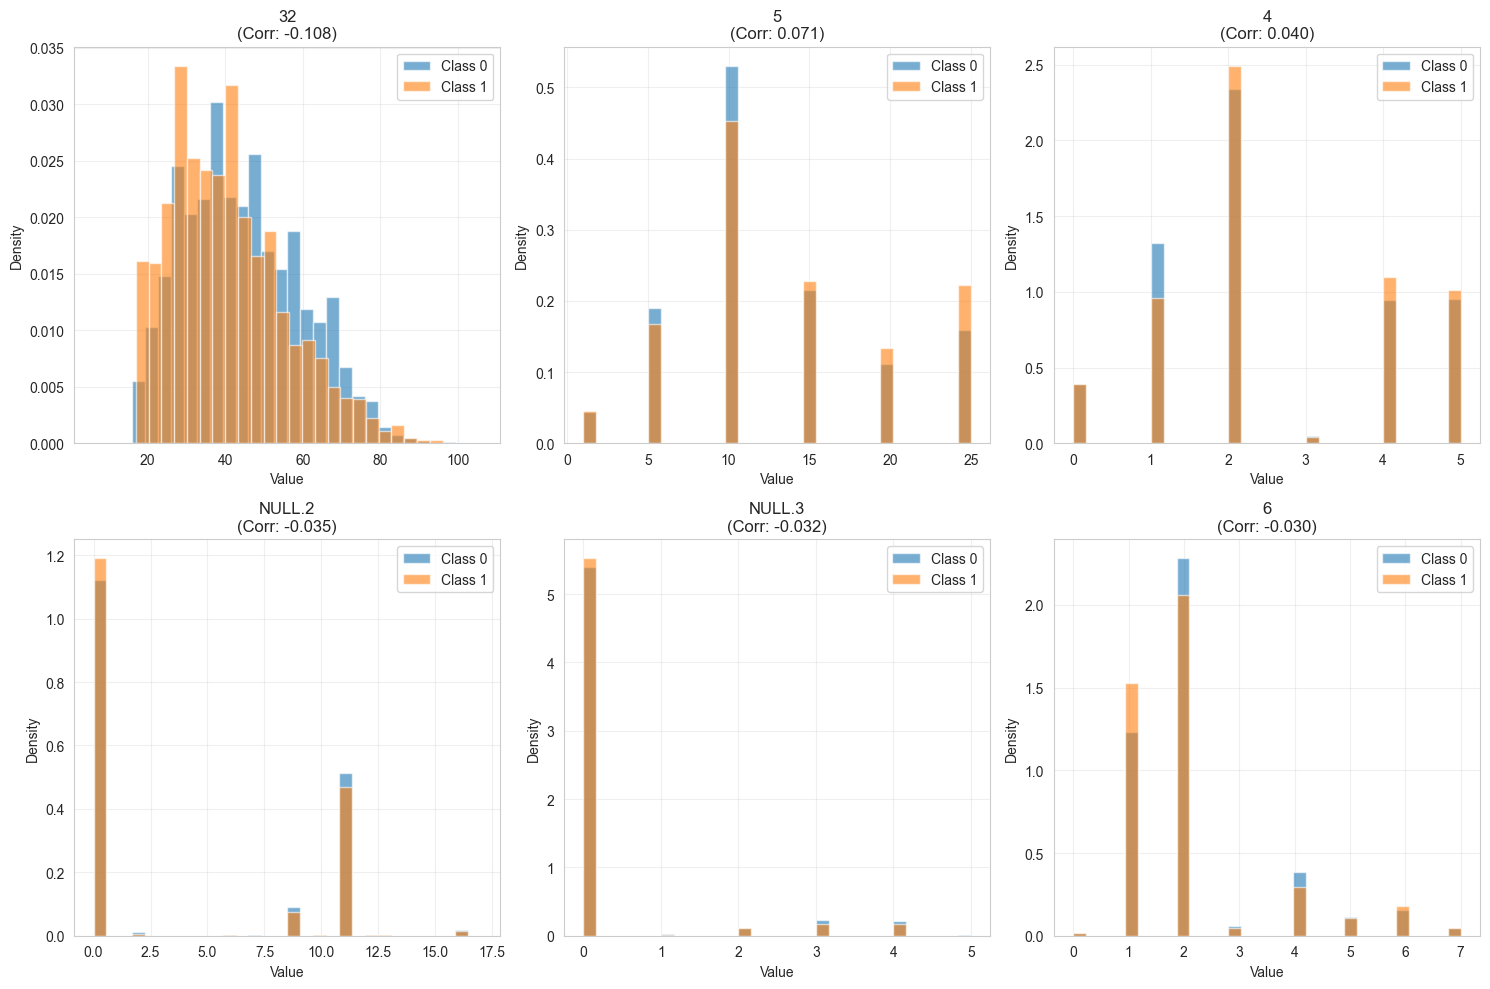

In [42]:
# Visualize distributions of top features by target class
top_features = influence_df.head(6)['Feature'].tolist()

if len(top_features) > 0:
    n_cols = 3
    n_rows = (len(top_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    target_values = sorted(df[target_col].unique())
    
    for idx, col in enumerate(top_features[:n_rows*n_cols]):
        ax = axes[idx]
        
        # Plot distributions for each target class
        for target_val in target_values:
            data = df[df[target_col] == target_val][col].dropna()
            ax.hist(data, alpha=0.6, label=f'Class {target_val}', bins=30, density=True)
        
        ax.set_title(f'{col}\n(Corr: {influence_df[influence_df["Feature"]==col]["Correlation"].values[0]:.3f})')
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(top_features), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


### Categorical Features Influence on Target


In [43]:
# Analyze categorical features' influence on target
print("="*70)
print("CATEGORICAL FEATURES INFLUENCE ON TARGET")
print("="*70)

categorical_features = features_df.select_dtypes(include=['object']).columns.tolist()
categorical_influence = []

target_values = sorted(df[target_col].unique())

for col in categorical_features:
    if features_df[col].isnull().all():
        continue
    
    # Calculate distribution by target
    crosstab = pd.crosstab(df[col], df[target_col], normalize='index') * 100
    
    # Calculate which categories are more associated with each target class
    if len(target_values) == 2:
        # Get the difference in percentage between classes
        diff = abs(crosstab[target_values[1]] - crosstab[target_values[0]])
        max_diff = diff.max()
        
        # Chi-square test for independence
        try:
            from scipy.stats import chi2_contingency
            contingency_table = pd.crosstab(df[col], df[target_col])
            if contingency_table.min().min() > 0:  # Avoid division by zero
                chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            else:
                chi2, p_value = 0, 1
        except ImportError:
            print(f"Warning: scipy not available. Skipping chi-square test for {col}")
            chi2, p_value = 0, 1
        except Exception as e:
            chi2, p_value = 0, 1
        
        categorical_influence.append({
            'Feature': col,
            'Unique Values': df[col].nunique(),
            'Max % Difference': round(max_diff, 2),
            'Chi-square': round(chi2, 4),
            'P-value': round(p_value, 6),
            'Significant (p<0.05)': 'Yes' if p_value < 0.05 else 'No'
        })

cat_influence_df = pd.DataFrame(categorical_influence)
cat_influence_df = cat_influence_df.sort_values('P-value', ascending=True)

print(f"\nCategorical features by statistical significance:")
print(cat_influence_df.head(15).to_string(index=False))


CATEGORICAL FEATURES INFLUENCE ON TARGET

Categorical features by statistical significance:
Feature  Unique Values  Max % Difference  Chi-square  P-value Significant (p<0.05)
   RN.1             27             63.17    147.3156 0.000000                  Yes
      Y              2             50.20    184.2529 0.000000                  Yes
                    28             64.71     95.4136 0.000000                  Yes
      F              4             49.43     28.8760 0.000002                  Yes
    Web              3             55.08     23.8998 0.000006                  Yes
    N.2              2             48.69     12.5272 0.000401                  Yes
    N.1              2             48.49      3.4160 0.064566                   No
      C              1             47.84      0.0000 1.000000                   No
    N.3              1             47.84      0.0000 1.000000                   No
     .1             87            100.00      0.0000 1.000000                 

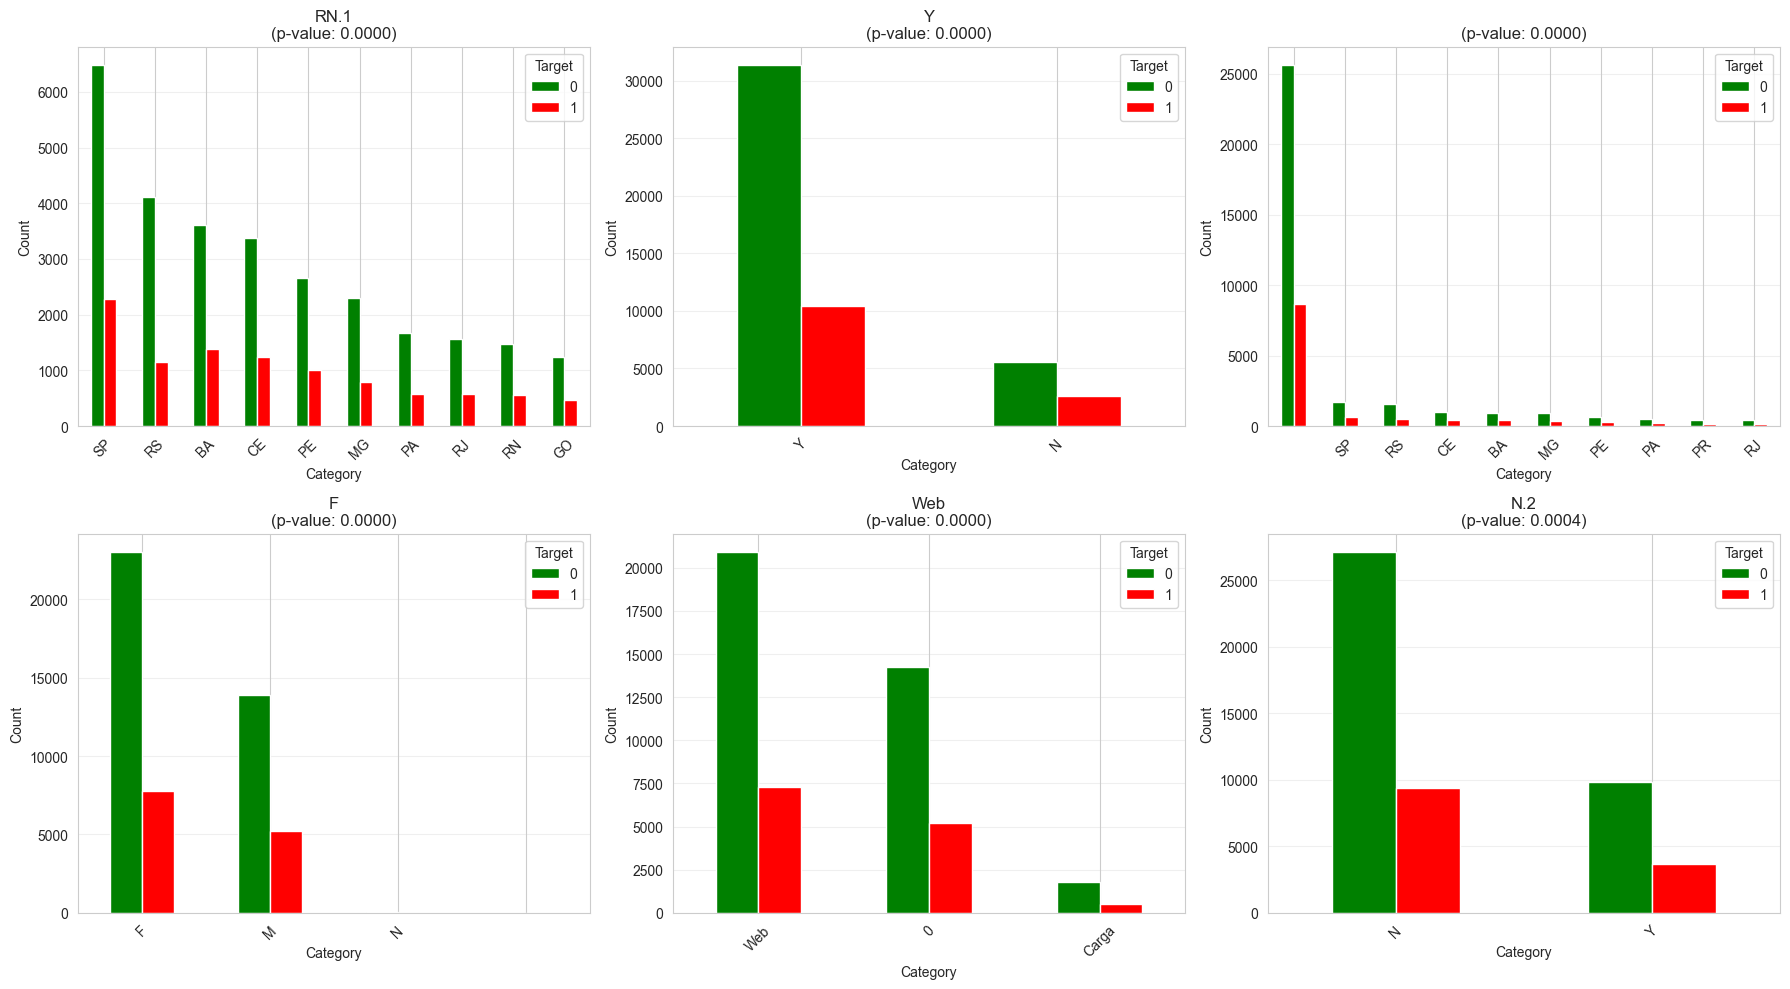

In [44]:
# Visualize top categorical features by target
top_cat_features = cat_influence_df.head(6)['Feature'].tolist()

if len(top_cat_features) > 0:
    n_cols = 3
    n_rows = (len(top_cat_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(top_cat_features[:n_rows*n_cols]):
        ax = axes[idx]
        
        # Create stacked bar chart
        crosstab = pd.crosstab(df[col], df[target_col])
        
        # Get top 10 categories by frequency
        top_cats = crosstab.sum(axis=1).nlargest(10).index
        crosstab_top = crosstab.loc[top_cats]
        
        crosstab_top.plot(kind='bar', stacked=False, ax=ax, color=['green', 'red'])
        ax.set_title(f'{col}\n(p-value: {cat_influence_df[cat_influence_df["Feature"]==col]["P-value"].values[0]:.4f})')
        ax.set_xlabel('Category')
        ax.set_ylabel('Count')
        ax.legend(title='Target')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3, axis='y')
    
    # Hide empty subplots
    for idx in range(len(top_cat_features), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


### Outliers Impact on Target


In [45]:
# Analyze if outliers are associated with specific target classes
print("="*70)
print("OUTLIERS IMPACT ON TARGET")
print("="*70)

top_outlier_features = outlier_df.head(5)['Column'].tolist()
outlier_target_analysis = []

for col in top_outlier_features:
    outliers_iqr, _, _ = detect_outliers_iqr(features_df, col)
    
    if len(outliers_iqr) > 0:
        # Get indices of outliers
        outlier_indices = outliers_iqr.index
        
        # Get target distribution for outliers vs non-outliers
        outlier_target_dist = df.loc[outlier_indices, target_col].value_counts(normalize=True) * 100
        non_outlier_indices = features_df.index.difference(outlier_indices)
        non_outlier_target_dist = df.loc[non_outlier_indices, target_col].value_counts(normalize=True) * 100
        
        # Calculate difference
        target_vals = sorted(df[target_col].unique())
        if len(target_vals) == 2:
            outlier_diff = abs(outlier_target_dist.get(target_vals[0], 0) - 
                              non_outlier_target_dist.get(target_vals[0], 0))
            
            outlier_target_analysis.append({
                'Feature': col,
                'N Outliers': len(outliers_iqr),
                f'Outliers - Class {target_vals[0]} %': round(outlier_target_dist.get(target_vals[0], 0), 2),
                f'Non-Outliers - Class {target_vals[0]} %': round(non_outlier_target_dist.get(target_vals[0], 0), 2),
                'Difference': round(outlier_diff, 2)
            })

outlier_target_df = pd.DataFrame(outlier_target_analysis)
if len(outlier_target_df) > 0:
    outlier_target_df = outlier_target_df.sort_values('Difference', ascending=False)
    print("\nOutlier distribution by target class:")
    print(outlier_target_df.to_string(index=False))
else:
    print("\nNo significant outlier-target relationships found.")


OUTLIERS IMPACT ON TARGET

Outlier distribution by target class:
Feature  N Outliers  Outliers - Class 0 %  Non-Outliers - Class 0 %  Difference
      5        8787                 68.16                     75.15        6.99
      6        7912                 75.81                     73.56        2.24
    1.8        7310                 73.06                     74.07        1.00
      9       12152                 74.67                     73.68        0.99
    1.5        9886                 73.20                     74.10        0.89


### Summary of Deep Analysis


In [46]:
# Summary of findings
print("="*70)
print("SUMMARY OF DEEP ANALYSIS FINDINGS")
print("="*70)

print(f"\n1. TARGET VARIABLE: '{target_col}'")
print(f"   - Distribution: {dict(df[target_col].value_counts())}")
print(f"   - Balance: {df[target_col].value_counts(normalize=True).min()*100:.1f}% - {df[target_col].value_counts(normalize=True).max()*100:.1f}%")

print(f"\n2. OUTLIERS:")
if len(outlier_df) > 0:
    print(f"   - Columns with most outliers: {outlier_df.head(3)['Column'].tolist()}")
    print(f"   - Max outlier percentage: {outlier_df['Outliers % (IQR)'].max():.2f}%")

print(f"\n3. TOP NUMERICAL FEATURES INFLUENCING TARGET:")
if len(influence_df) > 0:
    top_3_num = influence_df.head(3)
    for _, row in top_3_num.iterrows():
        corr_sign = "+" if row['Correlation'] > 0 else "-"
        print(f"   - {row['Feature']}: {corr_sign}correlation = {abs(row['Correlation']):.4f}")

print(f"\n4. TOP CATEGORICAL FEATURES INFLUENCING TARGET:")
if len(cat_influence_df) > 0:
    top_3_cat = cat_influence_df.head(3)
    for _, row in top_3_cat.iterrows():
        print(f"   - {row['Feature']}: p-value = {row['P-value']:.6f} ({row['Significant (p<0.05)']})")

print(f"\n5. OUTLIER-TARGET RELATIONSHIPS:")
if len(outlier_target_df) > 0:
    print(f"   - Features where outliers affect target distribution:")
    for _, row in outlier_target_df.head(3).iterrows():
        print(f"     • {row['Feature']}: {row['Difference']:.2f}% difference")

print("\n" + "="*70)
print("Key insights:")
print("="*70)
print("• Features with high correlation/chi-square should be prioritized for modeling")
print("• Outliers should be reviewed - they may represent important edge cases")
print("• Consider feature engineering based on the differences between target classes")
print("="*70)


SUMMARY OF DEEP ANALYSIS FINDINGS

1. TARGET VARIABLE: '1.9'
   - Distribution: {0: 36959, 1: 13040}
   - Balance: 26.1% - 73.9%

2. OUTLIERS:
   - Columns with most outliers: ['9', '1.5', '5']
   - Max outlier percentage: 24.30%

3. TOP NUMERICAL FEATURES INFLUENCING TARGET:
   - 32: -correlation = 0.1079
   - 5: +correlation = 0.0707
   - 4: +correlation = 0.0402

4. TOP CATEGORICAL FEATURES INFLUENCING TARGET:
   - RN.1: p-value = 0.000000 (Yes)
   - Y: p-value = 0.000000 (Yes)
   -  : p-value = 0.000000 (Yes)

5. OUTLIER-TARGET RELATIONSHIPS:
   - Features where outliers affect target distribution:
     • 5: 6.99% difference
     • 6: 2.24% difference
     • 1.8: 1.00% difference

Key insights:
• Features with high correlation/chi-square should be prioritized for modeling
• Outliers should be reviewed - they may represent important edge cases
• Consider feature engineering based on the differences between target classes
